# TITLE: *AUTOCORRECT TOOL*

#### An AI, NLP driven autocorrect tool to improve text accuracy and fluency, reducing errors in typing and communication.

By ADITYA KUMAR

# Importing Libraries and Required Packages

In [15]:
from collections import Counter
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# DATA PREVIEW

In [19]:
def display_original_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    
    print("Original Text Data:\n")
    print(text)

# File path to your text data
file_path = 'BlackBox/few_data1.txt'

# Display the original text
display_original_text(file_path)

# Preview the data
# print(data[:1000])  # Display the first 1000 characters

Original Text Data:

As things now stand, the course of instruction in American history in
our public schools embraces three distinct treatments of the subject.
Three separate books are used. First, there is the primary book, which
is usually a very condensed narrative with emphasis on biographies and
anecdotes. Second, there is the advanced text for the seventh or eighth
grade, generally speaking, an expansion of the elementary book by the
addition of forty or fifty thousand words. Finally, there is the high
school manual. This, too, ordinarily follows the beaten path, giving
fuller accounts of the same events and characters. To put it bluntly, we
do not assume that our children obtain permanent possessions from their
study of history in the lower grades. If mathematicians followed the
same method, high school texts on algebra and geometry would include the
multiplication table and fractions.

There is, of course, a ready answer to the criticism advanced above. It
is that teachers hav

# DATA CLEANING AND PREPROCESSING

In [20]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

cleaned_data = clean_text(data)

# Tokenize sentences and words
sentences = sent_tokenize(cleaned_data)
words = word_tokenize(cleaned_data)

print("Sample Sentences:", sentences[:5])
print("Sample Words:", words[:20])

Sample Sentences: ['as things now stand the course of instruction in american history in our public schools embraces three distinct treatments of the subject three separate books are used first there is the primary book which is usually a very condensed narrative with emphasis on biographies and anecdotes second there is the advanced text for the seventh or eighth grade generally speaking an expansion of the elementary book by the addition of forty or fifty thousand words finally there is the high school manual this too ordinarily follows the beaten path giving fuller accounts of the same events and characters to put it bluntly we do not assume that our children obtain permanent possessions from their study of history in the lower grades if mathematicians followed the same method high school texts on algebra and geometry would include the multiplication table and fractions there is of course a ready answer to the criticism advanced above it is that teachers have learned from bitter exp

In [27]:
import nltk
nltk.download('words')
from nltk.corpus import words

# Get list of words from NLTK corpus
corpus_words = words.words()

# Saving corpus as a text file for SymSpell input
with open('BlackBox/few_data1.txt', 'w') as f:
    for word in corpus_words:
        f.write(f"{word.lower()}\n")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Showing the first 10 lines of the file:

a
a
aa
aal
aalii
aam
aani
aardvark
aardwolf
aaron


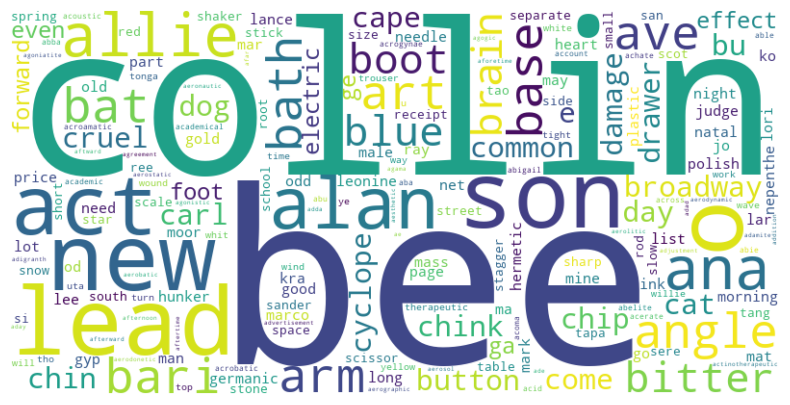

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to show the first few lines of the text data
def display_text_data(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        print(f"Showing the first {num_lines} lines of the file:\n")
        for line in lines[:num_lines]:
            print(line.strip())

# Function to generate and display a word cloud
def display_wordcloud(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

# File path to your text data
file_path = 'BlackBox/few_data.txt'

# Display the text data
display_text_data(file_path)

# Display the word cloud
display_wordcloud(file_path)

# Initialize and Load SymSpell Dictionary

#### The SymSpell library is initialized with a maximum edit distance of 2 and a prefix length of 7. This configuration defines how far the corrections can deviate from the original word and how long the word prefixes should be.

#### The dictionary frequency_dictionary_en_82_765.txt is loaded into the SymSpell object to enable autocorrect functionalities based on word frequencies.

In [29]:
from symspellpy.symspellpy import SymSpell, Verbosity

# Initialize SymSpell object
max_dictionary_edit_distance = 2  # maximum edit distance for corrections
prefix_length = 7  # length of word prefixes to consider
sym_spell = SymSpell(max_dictionary_edit_distance, prefix_length)

# Load dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
term_index = 0  # column of the word
count_index = 1  # column of the frequency
sym_spell.load_dictionary(dictionary_path, term_index, count_index)

True

# Autocorrect Function

#### This function takes an input text and checks if it is a single word or a sentence.

#### For single words, it uses SymSpell to find the closest correct word based on the dictionary loaded.

#### For sentences, it splits the input into individual words, corrects each word, and then joins the corrected words back into a sentence.

In [30]:
def autocorrect(input_text):
    # Check if the input is a word or a sentence
    if ' ' in input_text:
        corrected_sentence = []
        for word in input_text.split():
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
            if suggestions:
                corrected_sentence.append(suggestions[0].term)
            else:
                corrected_sentence.append(word)
        return ' '.join(corrected_sentence)
    else:
        # For a single word
        suggestions = sym_spell.lookup(input_text, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            return suggestions[0].term
        else:
            return input_text

In [32]:
import nltk
from nltk.corpus import words
from difflib import get_close_matches

# Download the NLTK corpus of English words if not already downloaded
nltk.download('words')

# Function to simulate autocorrect suggestions
def autocorrect(word, word_list):
    # Find close matches for the input word from the word_list
    matches = get_close_matches(word, word_list, n=1, cutoff=0.8)
    
    # If there's a match, return it; otherwise, suggest the original word
    if matches:
        return matches[0]
    else:
        return "No suggestions. The word is either correct or no close match found."

# Function to take user input and test autocorrect
def test_autocorrect():
    # Load NLTK's words corpus for a comprehensive dictionary of English words
    word_list = words.words()

    # Take user input for the word they want to check
    input_word = input("Enter a word to autocorrect: ")

    # Get autocorrected suggestion
    suggestion = autocorrect(input_word, word_list)
    
    print(f"Suggested correction: {suggestion}")

# Run the test
test_autocorrect()


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rishuraj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Enter a word to autocorrect:  lighd


Suggested correction: light
